# NN Assignent - 2
<b>
<p >Assignment No: 2</p>
<p >Name : Krutika Injamuri</p>
<p >Roll No:18MCMT20</p>
<p>Brach: MTech CS</p>
</b>

In [4]:
!ls -al

total 53688
drwxr-xr-x 1 root root     4096 Oct  8 07:25 .
drwxr-xr-x 1 root root     4096 Oct  7 13:02 ..
drwxr-xr-x 4 root root     4096 Sep 28 23:11 .config
drwxr-xr-x 2 root root     4096 Sep 28 23:32 sample_data
-rw-r--r-- 1 root root  7840016 Oct  8 07:25 t10k-images.idx3-ubyte
-rw-r--r-- 1 root root    10008 Oct  8 07:22 t10k-labels.idx1-ubyte
-rw-r--r-- 1 root root 47040016 Oct  8 07:41 train-images.idx3-ubyte
-rw-r--r-- 1 root root    60008 Oct  8 07:25 train-labels.idx1-ubyte


In [4]:
from google.colab import files
import io
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte
Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte
Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte
Saving train-images.idx3-ubyte to train-images.idx3-ubyte
User uploaded file "t10k-labels.idx1-ubyte" with length 10008 bytes
User uploaded file "t10k-images.idx3-ubyte" with length 7840016 bytes
User uploaded file "train-labels.idx1-ubyte" with length 60008 bytes
User uploaded file "train-images.idx3-ubyte" with length 47040016 bytes


**Imports Used throughout assignment:**


In [0]:
import time
import struct as st
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import interpolation

In [19]:

stime = time.time()
filename = {'images' : 'train-images.idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte','testImages' : 't10k-images.idx3-ubyte' ,'testLabels' : 't10k-labels.idx1-ubyte'}

labels_array = np.array([])

data_types = {
        0x08: ('ubyte', 'B', 1),
        0x09: ('byte', 'b', 1),
        0x0B: ('>i2', 'h', 2),
        0x0C: ('>i4', 'i', 4),
        0x0D: ('>f4', 'f', 4),
        0x0E: ('>f8', 'd', 8)}

for name in filename.keys():
    if name == 'images':
        imagesfile = open(filename[name],'rb')
    if name == 'labels':
        labelsfile = open(filename[name],'rb')
    if name == 'testImages':
        testImagesFile = open(filename[name],'rb')
    if name == 'testLabels':
        testLabelsFile = open(filename[name],'rb')

        
def getParams(file):
  file.seek(4)
  nImg = st.unpack('>I',file.read(4))[0] #num of images/labels
  nR = st.unpack('>I',file.read(4))[0] #num of rows
  nC = st.unpack('>I',file.read(4))[0] #num of columns
  return nImg,nR,nC
  
#reading magic number
imagesfile.seek(0)
magic = st.unpack('>4B',imagesfile.read(4))

# print(magic)
if(magic[0] and magic[1])or(magic[2] not in data_types):
    raise ValueError("File Format not correct")

nDim = magic[3]
print("Data is ",nDim,"-D")


nImg,nR,nC= getParams(imagesfile)
nBytes = nImg*nR*nC
labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)


nImgTest,nRTest,nCTest= getParams(testImagesFile)
nBytesTest = nImgTest*nRTest*nCTest
testLabelsFile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images test :: ",nImgTest)
print("no. of rows test:: ",nRTest)
print("no. of columns test:: ",nCTest)


#Read all data bytes at once and then reshape
normalizingValue=(255  *0.99 + 0.01)
train_imgs = np.asarray(st.unpack('>'+'B'*nBytes,imagesfile.read(nBytes))).reshape((nImg,nR*nC))
train_labels = np.asarray(st.unpack('>'+'B'*nImg,labelsfile.read(nImg))).reshape((nImg,1))

test_imgs = np.asarray(st.unpack('>'+'B'*nBytesTest,testImagesFile.read(nBytesTest))).reshape((nImgTest,nRTest*nCTest))
test_labels = np.asarray(st.unpack('>'+'B'*nImgTest,testLabelsFile.read(nImgTest))).reshape((nImgTest,1))
# images_array=np.true_divide(images_array,normalizingValue)
# test_images_array=np.true_divide(test_images_array,normalizingValue)


lr = np.arange(10)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

train_imgs=0.99 - (((0.98) * (255 - train_imgs)) / 255)
test_imgs=0.99 - (((0.98) * (255 - test_imgs)) / 255)


no_of_different_labels = 10 
image_size=28
image_pixels = image_size * image_size
print("Time of execution : %s seconds" % str(time.time()-stime))

Data is  3 -D
no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
no. of images test ::  10000
no. of rows test::  28
no. of columns test::  28
Time of execution : 4.762466669082642 seconds


In [0]:

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def sigDerivative(x):
  return x*(1-x)
  
activation_function = sigmoid

class NeuralNetwork:
    
    def __init__(self,inNodes, outNodes, hiddenNodes,learningRate,epochs):
      self.inNodes = inNodes
      self.outNodes = outNodes
      self.hiddenNodes = hiddenNodes
      self.learningRate = learningRate 
      self.itohweights=np.random.randn(self.hiddenNodes, self.inNodes)
      self.htooweights=np.random.randn(self.outNodes, self.hiddenNodes)
      self.itohchangeWeights=np.random.randn(self.hiddenNodes, self.inNodes)
      self.htoochangeWeights=np.random.randn(self.outNodes, self.hiddenNodes)
      self.xj=[]
      self.epochs=epochs
        
    def forwardPropagation(self,inputVector):
      inputVector = np.array(inputVector, ndmin=2).T

      output_vector1 = np.dot(self.itohweights, inputVector)
      self.xj = sigmoid(output_vector1)

      output_vector2 = np.dot(self.htooweights,self.xj)
      return sigmoid(output_vector2)
      
    def backPropagation(self,inputVector,targetVector,expectedVector,regularization):
        targetVector = np.array(targetVector, ndmin=2).T
        inputVector = np.array(inputVector, ndmin=2).T
      
        errors = targetVector - expectedVector
        tmp = errors * sigDerivative(expectedVector )
        if regularization == None:
          self.htooweights += self.learningRate  * np.dot(tmp,self.xj.T)
        else:
          self.htooweights += self.learningRate  * np.dot(tmp,self.xj.T) + 0.0001*self.htoochangeWeights
          self.htoochangeWeights=np.dot(tmp,self.xj.T)
        
        # calculate hidden errors:
        hidden_errors = np.dot(self.htooweights.T,errors)
        # update the weights:
        tmp = hidden_errors * sigDerivative(self.xj)
        if regularization == None:
          self.itohweights += self.learningRate * np.dot(tmp, inputVector.T)

        else:
          self.itohweights += self.learningRate * np.dot(tmp, inputVector.T) + 0.0001*self.itohchangeWeights
          self.itohchangeWeights=np.dot(tmp, inputVector.T)
      
    
    def train(self, inputVector, targetVector,reg):
        for ep in range(self.epochs):
          self.backPropagation(inputVector,targetVector,self.forwardPropagation(inputVector),reg)
          
          
    def run(self, inputVector):
       
        return self.forwardPropagation(inputVector)
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm   
    def evaluate(self, data, labels):
      corrects, wrongs = 0, 0
      for i in range(len(data)):
          res = self.run(data[i])
          res_max = res.argmax()
          if res_max == labels[i]:
              corrects += 1
          else:
              wrongs += 1
      return corrects, wrongs

In [0]:
class measuresOfConMatrix:
  def __init__(self,cm):
    self.cm=cm
    self.TP=self.getTP()
    self.TN=self.getTN()
    self.FP=self.getFP()
    self.FN=self.getFN()
    self.tot=self.TP+self.TN+self.FP+self.FN
  def errorRate(self):
    return np.around(((self.FP+self.FN)/self.tot),decimals=3)

  def accuracy(self):
    return np.around((self.TP+self.TN)/self.tot,decimals=3)

  def precision(self):
    return np.around((self.TP/(self.TP+self.FP)),decimals=3)
  def recall(self):
    return np.around((self.TP/(self.TP+self.FN)),decimals=3)
  def specificity(self):
    return np.around((self.TN/(self.FP+self.TN)),decimals=3)

  def getTP(self):
        return np.diag(self.cm)
  def getFP(self):
      FP = []
      for i in range(10):
        FP.append(sum(self.cm[:,i]) - self.cm[i,i])
      return np.array(FP)
  def getFN(self):  
      FN = []
      for i in range(10):
          FN.append(sum(self.cm[i,:]) - self.cm[i,i])
      return np.array(FN)
  def getTN(self):
      TN = []
      for i in range(10):
          temp = np.delete(self.cm, i, 0)   # delete ith row
          temp = np.delete(temp, i, 1)  # delete ith column
          TN.append(sum(sum(temp)))
      return np.array(TN)

**5 FoldCross Validation:**

 In the below we are doing a 5 fold cross validation. The entire data set is divided into 5 equal partions. In each iteration we consider 4 sets as the training sets and remaining set as the test set. Over these training and test sets the model is trained and tested. Each time error is calculated. This is called as the cross validation error. Average is found of these error values.
 
 The above process is repeated for different models and the one with the least average error is chosen. This model is then used to train the entire dataset and then test it. 
 
 This process of cross validations allows us to choose the best model with least average error.
 
 In the below code Stochaistic Gradient odel is used with different hyper parameters in each Cross Validation.
 
 **Observations:**

1.  As the number of hidden unit increases the time taken to execute also increases
2.   As the chosen model is Stochaistic Gradient descent, it updates the weight matrix for each of the epoch and hence the time consumed is more.
3. The minimum cross validation average error is **0.17984**

**Confusion Matrix:**

It is a 10 x 10 matrix, where the rows represent the true label of a test sample and the columnsrepresent the predicted labels of the NN classifier

There are many measures of Confusion matrix like error, accuracy, standard deviation and many more.

TP: True Positive
TN: True Negative
FP: False Positive
FP: False Negative

Error = (FP+FN)/(TP+TN+FP+FN)

Accuracy = (TP+TN)/(TP+TN+FP+FN)

Sensitivity/Recall = TP/(TP+FN)

Specificity = TN/(FP+TN)

Precision =  TP/(TP+FP)

Below are the observations for the best model used
Model  Used :  Stochastic Gradient descent Model

Hyper Parameters:

$\eta $=0.01, 
number of hidden layers = 1, 
number of hidden nodes in one layer = 100, 
number of epochs = 1

**Confusion Matrix obtained:**

$\left[ \begin{array}{cccc}
 956&0& 12&4&0& 10&8&2&4&4\\
1& 1121&6&6&0&6&4& 18& 10& 11\\
2&2&934&6&5&4&2& 16&7&0\\
1&3& 17&932&0& 43&0&7& 12& 15\\
0&0& 11&3&888&8&7&8&5& 11\\
2&1&1&6&0&747&9&1&4&0\\
7&4& 13&3& 10& 10&917&1&4&1\\
2&1&7&5&0&3&0&923&4&4\\
7&3& 27& 33& 13& 44& 11&4&905& 11\\
2&0&4& 12& 66& 17&0& 48& 19&952\\\\
\end{array} \right]$




**Total Accuracy:** 86.96%

** Total Error: ** 13.0999%

**Average Error of all folds in Cross Validation: **   0.17968
 
 
 **Average Error of digits:** 2.61%
 **Average Standard Deviation:**  0.00938562730988185
 

 | Digit | Precision|Recall|Accuracy | Specificity |Error
|------|------|------|------|------|------|
| 0 |  0.976 |  0.956 |  0.993 |  0.997 |0.007
| 1 |  0.988 |  0.948 |  0.992 |  0.998 |0.008
| 2 |  0.905 |  0.955 |  0.986 |  0.989 |0.014
| 3 |  0.923 |  0.905 |  0.982 |  0.991 |0.018
| 4 |  0.904 |  0.944 |  0.985 |  0.99 |0.015
| 5 |  0.837 |  0.969 |  0.983 |  0.984 |0.017
| 6 |  0.957 |  0.945 |  0.991 |  0.995 |0.009
| 7 |  0.898 |  0.973 |  0.987 |  0.988 |0.013
| 8 |  0.929 |  0.855 |  0.978 |  0.992 |0.022
| 9 |  0.944 |  0.85 |  0.978 |  0.994 |0.022

In [27]:
train_imgs=train_imgs.reshape(nImg,nR*nC)

test_imgs=test_imgs.reshape(nImgTest,nRTest*nCTest)
numberOfFolds=5
hyperParameters=[[100,0.1,1],[100,0.1,5],[150,0.1,1],[150,0.1,5],[200,0.1,1],[200,0.1,5]]
# hyperParameters=[[100,0.1,1,100],[100,0.1,1,200],[100,0.1,1,300],[100,0.1,1,400],[100,0.1,1,500],[100,0.1,1,600],[100,0.1,1,00],]

errorTracker=[]
stdTracker=[]
avgErrorTracker=[]
minErrorIndex=0
minError=10000

for index in range(len(hyperParameters)):
  print("-----------------------------------START----------------------------------------")
  kfold = KFold(numberOfFolds,False, 1)
  print("hiddenNodes : ", hyperParameters[index][0], "learningRate = ",hyperParameters[index][1],"epochs= ",hyperParameters[index][2])
  foldError=[]
  stdError=[]
  for train, test in kfold.split(train_imgs):
    nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[index][0], learningRate = hyperParameters[index][1],epochs=hyperParameters[index][2])
    trainingSetImg=train_imgs[train]
    testingSetImg=train_imgs[test]   
    trainingSetLabel=train_labels_one_hot[train]
    testingSetLabel=train_labels_one_hot[test]
    for k in range(trainingSetImg.shape[0]):
      nn.train(trainingSetImg[k], trainingSetLabel[k],None)
    cm = nn.confusion_matrix(testingSetImg, testingSetLabel)

    conMatrixMeasures=measuresOfConMatrix(cm)
    foldError.append(np.average(conMatrixMeasures.errorRate()))
    stdError.append(np.std(conMatrixMeasures.errorRate()))
  print("Error at folds : ",foldError)
  errorTracker.append(foldError)
  stdTracker.append(stdError)
  avgError=np.average(foldError)
  print("Average Error : ",avgError)
  avgErrorTracker.append(avgError)
  if(avgError<minError):
    minError=avgError
    minErrorIndex=index
  print("-----------------------------------END----------------------------------------")
   
print("Min Error Index : ",minErrorIndex,"Min Error : ",minError)
print("Model Used: ",hyperParameters[minErrorIndex])    
nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[minErrorIndex][0], learningRate = hyperParameters[minErrorIndex][1],epochs=hyperParameters[minErrorIndex][2])   
for i in range(train_imgs.shape[0]):
  nn.train(train_imgs[i],train_labels_one_hot[i],None)
cm=nn.confusion_matrix(test_imgs, test_labels)
print(cm)
conMatrixMeasures=measuresOfConMatrix(cm)
corrects, wrongs = nn.evaluate(test_imgs, test_labels)
accuracy=corrects / ( corrects + wrongs)
for i in range(10):
  print("digit: ", i, "Precision: ", conMatrixMeasures.precision()[i], "Recall: ", conMatrixMeasures.recall()[i],
       "Accuracy: ", conMatrixMeasures.accuracy()[i], "Specificity: ", conMatrixMeasures.specificity()[i],
       "errorRate: ",conMatrixMeasures.errorRate()[i])
print("Accuracy : ",accuracy,"Total Error : ",1-accuracy,"Average error: ",np.average(conMatrixMeasures.errorRate()),"Average Standar Deviation of Error Rate:",np.std(conMatrixMeasures.errorRate()));



-----------------------------------START----------------------------------------
hiddenNodes :  100 learningRate =  0.1 epochs=  1
Error at folds :  [0.17930000000000001, 0.1791, 0.1804, 0.17960000000000004, 0.18080000000000002]
Average Error :  0.17984000000000006
-----------------------------------END----------------------------------------
-----------------------------------START----------------------------------------
hiddenNodes :  100 learningRate =  0.1 epochs=  5
Error at folds :  [0.17990000000000003, 0.1799, 0.1804, 0.181, 0.18120000000000003]
Average Error :  0.18048000000000003
-----------------------------------END----------------------------------------
-----------------------------------START----------------------------------------
hiddenNodes :  150 learningRate =  0.1 epochs=  1
Error at folds :  [0.18010000000000004, 0.17930000000000001, 0.18080000000000002, 0.18040000000000003, 0.18180000000000002]
Average Error :  0.18048000000000003
--------------------------------

Error at each fold : [0.17930000000000001, 0.1791, 0.1804, 0.17960000000000004, 0.18080000000000002]


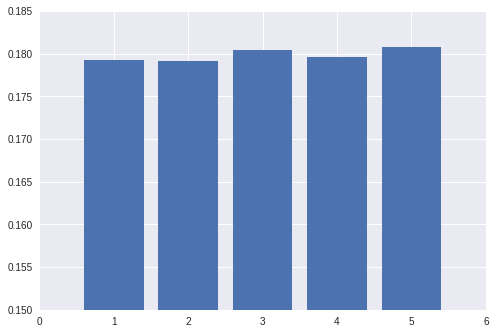

Standard Deviation Error at each fold : [0.23908619784504503, 0.2392757614134787, 0.24077840434723377, 0.23958764575829025, 0.2410957486145287]


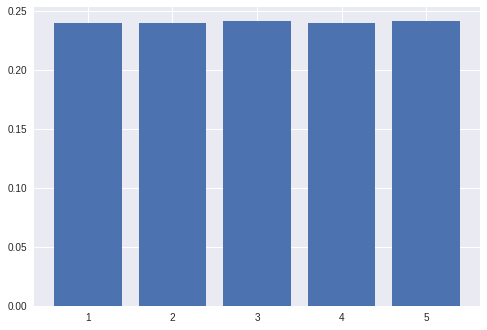

In [28]:
x=np.arange(1,numberOfFolds+1,1)
print("Error at each fold :",errorTracker[minErrorIndex])
plt.bar(x,errorTracker[minErrorIndex])
plt.xlim(0,6)
plt.ylim(0.15,0.185)
plt.show()
print("Standard Deviation Error at each fold :",stdTracker[minErrorIndex])

plt.bar(x,stdTracker[minErrorIndex])
plt.show()

** K Nearest Neighbour:**

This is a classifier that does not require any training.
 The prediction is done by calculating the eucledian distance. The 1 nearest neighbour that is closest is considered to be the class of the data point.
 
 Eucledian Distance is claculated as $\sqrt{(x1-x2)^2+(y1-y2)^2}$
 
 
 This is the simplest model that can be iplemented, but the drawback is the time taken to claculate. It has to find the distance between the given point and all the training set and then sort these distances to find the minimum. 
 

 
 
 **Accuracy for 1000 images:**  96.91%
 
**Observation:**

1. The accuracy of 1 NN Classifierr is very higher  than MLFFNN Classifier
2. 1 NN classification is kind of unsupervised learning.
3. Even though the accuracy is high, the performance is very poor. Time complexity is very high as it involves finding distance for each and every point and then sorting it.

In [14]:
train_imgs=train_imgs.reshape(nImg,nR,nC)
test_imgs=test_imgs.reshape(nImgTest,nRTest,nCTest)

def getAccuracy(predictions, answers):
    correct=0
    for i in range(len(answers)):
      if predictions[i]==answers[i][0]:
        correct+=1
    total = float(len(answers))
    return correct / total

def predictTestData(predictor, test_set):
   
    predictions=[]
    for i in range(len(test_set)):
      predictions.append(predictor.predict(test_set[i, :, :]) )
      if i%1000==0:
        print("Percentage Completed : ",end="")
        print((i/len(test_set))*100)
    return predictions


class NearestNeighbor(object):
    
    def __init__(self, dataset, k):
        self.dataset = dataset
        self.k = k
        
    def predict(self, point):
      candidates = self.dataset[:]
      neighbors = []
      while len(neighbors) < self.k:
          distances = [self.eucledianDistance(x[0], point) for x in candidates]
          best_distance = min(distances)
          index = distances.index(best_distance)
          neighbors.append(candidates[index])
          del candidates[index]

      prediction = [value[1][0] for value in neighbors]
      return prediction
      
    def eucledianDistance(self, img1, img2):
          return np.sum((img1-img2)**2)

    
   
           
dataset = []
for i in range(len(train_imgs)):
    dataset.append((train_imgs[i, :, :], train_labels[i]))
    
predictor= NearestNeighbor(dataset, 1)

test_set = test_imgs[:, :, :]
prediction = predictTestData(predictor, test_set) 

labels = np.asarray(test_labels[:])
accuracy = getAccuracy(prediction, labels)
print("Accuracy for 10000 test images in percentage: ",accuracy*100)

Percentage Completed : 0.0
Percentage Completed : 10.0
Percentage Completed : 20.0
Percentage Completed : 30.0
Percentage Completed : 40.0
Percentage Completed : 50.0
Percentage Completed : 60.0
Percentage Completed : 70.0
Percentage Completed : 80.0
Percentage Completed : 90.0
Accuracy for 10000 test images in percentage:  96.91


## **Weight Decay:**
It is a regularization term that is genaerally used to reduce the change that is caused due to big weights.
It is mainly used to avoid overfitting.
It is observed that for the best model used in the 1st question the accuracy using Weight Decay reguarizaton variation is pretty high.


**Accuracy: ** 93.24%

**Error: **6.76%

**Observations:**

1.  The accuracy attained is slightly high when compared to normal back propagation

2.  The lambda value used is 0.0001. If higher or lower values is used then the accuracy attained is not as high as 93.24%. It is around 90%.




In [32]:
nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[minErrorIndex][0], learningRate = hyperParameters[minErrorIndex][1],epochs=hyperParameters[minErrorIndex][2])   

for i in range(train_imgs.shape[0]):
  nn.train(train_imgs[i],train_labels_one_hot[i],"Weight Decay")
cm=nn.confusion_matrix(test_imgs, test_labels)
print(cm)
conMatrixMeasures=measuresOfConMatrix(cm)
corrects, wrongs = nn.evaluate(test_imgs, test_labels)
accuracy=corrects / ( corrects + wrongs)
for i in range(10):
  print("digit: ", i, "Precision: ", conMatrixMeasures.precision()[i], "Recall: ", conMatrixMeasures.recall()[i],
       "Accuracy: ", conMatrixMeasures.accuracy()[i], "Specificity: ", conMatrixMeasures.specificity()[i],
       "errorRate: ",conMatrixMeasures.errorRate()[i])
print("Accuracy : ",accuracy,"Total Error : ",1-accuracy,"Average error: ",np.average(conMatrixMeasures.errorRate()),"Average Standar Deviation of Error Rate:",np.std(conMatrixMeasures.errorRate()));



[[ 955    0   12    3    4    8   17    1    9   13]
 [   0 1114   11    2    0    1    4   17    4    3]
 [   3    2  923    9    1    2    2   23    4    1]
 [   3    3   29  944    0   19    3   10   18    7]
 [   1    0   19    1  927    7    4    9    5   28]
 [   6    1    0   22    0  825   15    1   21    5]
 [   7    5   14    4   15   12  906    0   10    1]
 [   0    1    9    6    2    0    0  915    5    9]
 [   3    9   10   13    4   10    5    0  881    8]
 [   2    0    5    6   29    8    2   52   17  934]]
digit:  0 Precision:  0.974 Recall:  0.934 Accuracy:  0.991 Specificity:  0.997 errorRate:  0.009
digit:  1 Precision:  0.981 Recall:  0.964 Accuracy:  0.994 Specificity:  0.998 errorRate:  0.006
digit:  2 Precision:  0.894 Recall:  0.952 Accuracy:  0.984 Specificity:  0.988 errorRate:  0.016
digit:  3 Precision:  0.935 Recall:  0.911 Accuracy:  0.984 Specificity:  0.993 errorRate:  0.016
digit:  4 Precision:  0.944 Recall:  0.926 Accuracy:  0.987 Specificity:  0.9

## **Deskewing:**
It will generally rotatte the image from slant to straight. In the below code scipy's interpolation is used inorder to deskew the image.

**Observation:**

1) The variation in  the result is not much different from mthe 1st question.

2) Accuracy acttained: 92.47%

3) Error: 7.53%

In [30]:

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix
  
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

  
def getNormalizedDeskewedImg(img):
  normalizedDeskwedImg=(0.99 - (((0.98) * (255 - deskew(img.reshape(28,28)))) / 255)).reshape(28*28)
  return normalizedDeskwedImg
  
nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[minErrorIndex][0], learningRate = hyperParameters[minErrorIndex][1],epochs=hyperParameters[minErrorIndex][2])   

for i in range(train_imgs.shape[0]):
  nn.train(train_imgs[i],train_labels_one_hot[i],None)
cm=nn.confusion_matrix(test_imgs, test_labels)
print(cm)
conMatrixMeasures=measuresOfConMatrix(cm)
corrects, wrongs = nn.evaluate(test_imgs, test_labels)
accuracy=corrects / ( corrects + wrongs)
for i in range(10):
  print("digit: ", i, "Precision: ", conMatrixMeasures.precision()[i], "Recall: ", conMatrixMeasures.recall()[i],
       "Accuracy: ", conMatrixMeasures.accuracy()[i], "Specificity: ", conMatrixMeasures.specificity()[i],
       "errorRate: ",conMatrixMeasures.errorRate()[i])
print("Accuracy : ",accuracy,"Total Error : ",1-accuracy,"Average error: ",np.average(conMatrixMeasures.errorRate()),"Average Standar Deviation of Error Rate:",np.std(conMatrixMeasures.errorRate()));



[[ 959    0   15    4    1   17   11    3    7    7]
 [   0 1112    6    2    0    3    3   17    2    4]
 [   2    1  906    7    4    1    2   17    5    0]
 [   1    6   28  944    1   45    2   11   32   11]
 [   3    0   14    0  916   12   14   10   15   30]
 [   1    0    0   10    0  760    9    0    7    0]
 [   2    4   11    1   10   15  912    0    9    0]
 [   5    0   10    9    0    3    0  923    8    4]
 [   6   11   33   22    3   22    4    8  876   14]
 [   1    1    9   11   47   14    1   39   13  939]]
digit:  0 Precision:  0.979 Recall:  0.937 Accuracy:  0.991 Specificity:  0.998 errorRate:  0.009
digit:  1 Precision:  0.98 Recall:  0.968 Accuracy:  0.994 Specificity:  0.997 errorRate:  0.006
digit:  2 Precision:  0.878 Recall:  0.959 Accuracy:  0.984 Specificity:  0.986 errorRate:  0.016
digit:  3 Precision:  0.935 Recall:  0.873 Accuracy:  0.98 Specificity:  0.993 errorRate:  0.02
digit:  4 Precision:  0.933 Recall:  0.903 Accuracy:  0.984 Specificity:  0.993 

## Actual Image:

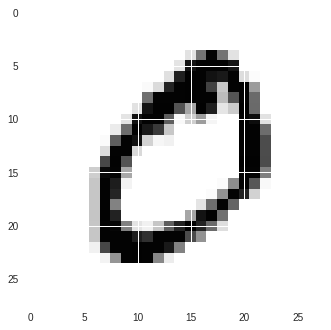

In [28]:
plt.imshow(train_imgs[1].reshape(28,28))


## Deskewed Image:

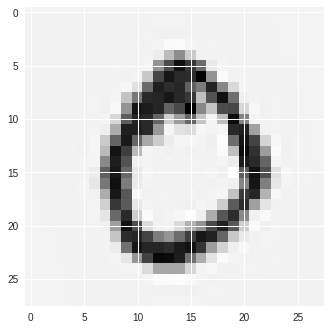

In [30]:
plt.imshow(deskew(train_imgs[1].reshape(28,28)))